# Machine Learning: AI Model Comparison
## Predicting Aircraft Turbulence using Decision Tree, KNN, and Logistic Regression

**Author:** Aaseaan Siwakoti, 
LMU ID:23057128
Milestone: 1


## 1. Import Required Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, auc)
import warnings
warnings.filterwarnings('ignore')

print("=" * 50)
print("MACHINE LEARNING MODELS: TURBULENCE PREDICTION")
print("=" * 50)

MACHINE LEARNING MODELS: TURBULENCE PREDICTION


## 2. Load and Explore Turbulence Data

In [97]:
# Load dataset
df = pd.read_csv('../turbulence_dataset.csv')
print(f"\n✓ Dataset loaded successfully!")
print(f"  Shape: {df.shape[0]} samples, {df.shape[1]} features")

# Display basic info
print("\n" + "=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(df.head(10))
print(f"\nDataset Info:")
print(f"  Missing values: {df.isnull().sum().sum()}")
print(f"\nTarget Distribution:")
print(df['Turbulence'].value_counts())
print(f"  Class 0 (No Turbulence): {(df['Turbulence'] == 0).sum()} samples ({(df['Turbulence'] == 0).sum() / len(df) * 100:.1f}%)")
print(f"  Class 1 (Turbulence): {(df['Turbulence'] == 1).sum()} samples ({(df['Turbulence'] == 1).sum() / len(df) * 100:.1f}%)")

# Statistics
print(f"\nBasic Statistics:")
print(df.describe())


✓ Dataset loaded successfully!
  Shape: 1000 samples, 8 features

DATASET OVERVIEW
   Altitude  Wind_Speed  Pressure  Temp_Gradient  Wind_Shear  \
0     35270         117       315           5.90        1.57   
1     28860          59       280           2.27        7.04   
2     33390         116       306           2.50        4.16   
3     33191         154       339           9.25        4.37   
4     39964         158       318           3.11        4.88   
5     39284          67       265           6.26        7.83   
6     33734         149       278           5.29        4.67   
7     34265         135       316           4.78        9.06   
8     28466          83       328           9.20        5.45   
9     32426          57       262           2.17        1.75   

   Vertical_Acceleration  Jet_Stream_Speed  Turbulence  
0                  0.024               173           1  
1                  0.018               112           0  
2                  0.104               1

## 3. Data Preparation

In [98]:
print("\n" + "=" * 50)
print("DATA PREPARATION")
print("=" * 50)

# Separate features and target
X = df.drop('Turbulence', axis=1)
y = df['Turbulence']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✓ Data split completed:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Testing set: {X_test.shape[0]} samples")

# Scale features (important for KNN and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✓ Features scaled using StandardScaler")


DATA PREPARATION
✓ Data split completed:
  Training set: 800 samples
  Testing set: 200 samples
✓ Features scaled using StandardScaler


## 4. Build and Train Predictive Models

In [99]:
print("\n" + "=" * 50)
print("MODEL TRAINING")
print("=" * 50)

# 1. Decision Tree
print("\n 1. DECISION TREE CLASSIFIER")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("✓ Decision Tree trained")

# 2. K-Nearest Neighbors (KNN)
print("\n 2. K-NEAREST NEIGHBORS (KNN)")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
print("✓ KNN trained (k=5)")

# 3. Logistic Regression
print("\n 3. LOGISTIC REGRESSION")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("✓ Logistic Regression trained")


MODEL TRAINING

 1. DECISION TREE CLASSIFIER
✓ Decision Tree trained

 2. K-NEAREST NEIGHBORS (KNN)
✓ KNN trained (k=5)

 3. LOGISTIC REGRESSION
✓ Logistic Regression trained


## 5. Evaluate Models

In [100]:
print("\n" + "=" * 50)
print("MODEL EVALUATION & COMPARISON")
print("=" * 50)

def evaluate_model(model_name, y_true, y_pred):
    """Calculate evaluation metrics for a model"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Evaluate all models
results = [
    evaluate_model('Decision Tree', y_test, dt_pred),
    evaluate_model('KNN (k=5)', y_test, knn_pred),
    evaluate_model('Logistic Regression', y_test, lr_pred)
]

# Create results dataframe
results_df = pd.DataFrame(results)
print("\n" + "=" * 50)
print("PERFORMANCE METRICS")
print("=" * 50)
print(results_df.to_string(index=False))


MODEL EVALUATION & COMPARISON

PERFORMANCE METRICS
              Model  Accuracy  Precision   Recall  F1-Score
      Decision Tree     0.995   1.000000 0.994220  0.997101
          KNN (k=5)     0.930   0.949153 0.971098  0.960000
Logistic Regression     0.950   0.960452 0.982659  0.971429


## 6. Detailed Analysis with Confusion Matrices

In [101]:
print("\n" + "=" * 50)
print("DETAILED ANALYSIS")
print("=" * 50)

print("\n 1. DECISION TREE RESULTS:")
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred, target_names=['No Turbulence', 'Turbulence']))

print("\n 2. KNN RESULTS:")
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred, target_names=['No Turbulence', 'Turbulence']))

print("\n 3. LOGISTIC REGRESSION RESULTS:")
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred, target_names=['No Turbulence', 'Turbulence']))


DETAILED ANALYSIS

 1. DECISION TREE RESULTS:
[[ 27   0]
 [  1 172]]
               precision    recall  f1-score   support

No Turbulence       0.96      1.00      0.98        27
   Turbulence       1.00      0.99      1.00       173

     accuracy                           0.99       200
    macro avg       0.98      1.00      0.99       200
 weighted avg       1.00      0.99      1.00       200


 2. KNN RESULTS:
[[ 18   9]
 [  5 168]]
               precision    recall  f1-score   support

No Turbulence       0.78      0.67      0.72        27
   Turbulence       0.95      0.97      0.96       173

     accuracy                           0.93       200
    macro avg       0.87      0.82      0.84       200
 weighted avg       0.93      0.93      0.93       200


 3. LOGISTIC REGRESSION RESULTS:
[[ 20   7]
 [  3 170]]
               precision    recall  f1-score   support

No Turbulence       0.87      0.74      0.80        27
   Turbulence       0.96      0.98      0.97       173


## 7. Cross-Validation Analysis

In [102]:
print("\n" + "=" * 70)
print("CROSS-VALIDATION SCORES (5-Fold)")
print("=" * 70)

cv_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
cv_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"\nDecision Tree: {cv_dt.mean():.4f} (+/- {cv_dt.std():.4f})")
print(f"KNN: {cv_knn.mean():.4f} (+/- {cv_knn.std():.4f})")
print(f"Logistic Regression: {cv_lr.mean():.4f} (+/- {cv_lr.std():.4f})")


CROSS-VALIDATION SCORES (5-Fold)

Decision Tree: 1.0000 (+/- 0.0000)
KNN: 0.9313 (+/- 0.0079)
Logistic Regression: 0.9313 (+/- 0.0194)


## 8. Visualize Predictions and Performance


GENERATING VISUALIZATIONS


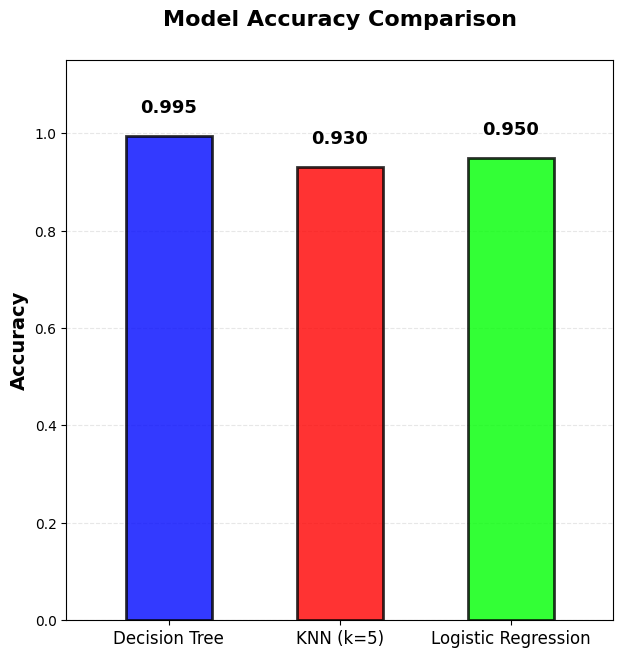

In [ ]:
print("\n" + "=" * 50)
print("GENERATING VISUALIZATIONS")
print("=" * 50)

# Ensure all required variables exist
if 'results_df' not in locals() or 'cv_dt' not in locals():
    print("Warning: Re-running model evaluation...")
    results = [
        evaluate_model('Decision Tree', y_test, dt_pred),
        evaluate_model('KNN (k=5)', y_test, knn_pred),
        evaluate_model('Logistic Regression', y_test, lr_pred)
    ]
    results_df = pd.DataFrame(results)

fig = plt.figure(figsize=(24, 16))

# 1. Accuracy Comparison - Large and Clean
ax1 = plt.subplot(2, 3, 1)
x_pos = np.arange(len(results_df))
accuracies = results_df['Accuracy'].values
colors = ["#0008ff", "#ff0000", "#00ff04"]
bars = ax1.bar(x_pos, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=2, width=0.5)
ax1.set_ylabel('Accuracy', fontsize=14, fontweight='bold')
ax1.set_title('Model Accuracy Comparison', fontsize=16, fontweight='bold', pad=25)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(['Decision Tree', 'KNN (k=5)', 'Logistic Regression'], fontsize=12)
ax1.set_ylim([0, 1.15])
ax1.set_xlim([-0.6, 2.6])
for i, v in enumerate(accuracies):
    ax1.text(i, v + 0.04, f'{v:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=13)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)



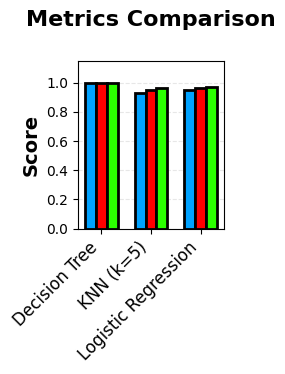

In [94]:
# 2. Metrics Comparison
ax2 = plt.subplot(2, 3, 5)
x = np.arange(len(results_df))
width = 0.22

ax2.bar(x - width, results_df['Accuracy'], width, label='Accuracy', color="#00a2ff", edgecolor='black', linewidth=2)
ax2.bar(x, results_df['Precision'], width, label='Precision', color="#ff0000", edgecolor='black', linewidth=2)
ax2.bar(x + width, results_df['F1-Score'], width, label='F1-Score', color="#2bff00", edgecolor='black', linewidth=2)

ax2.set_ylabel('Score', fontsize=14, fontweight='bold')
ax2.set_title('Metrics Comparison', fontsize=16, fontweight='bold', pad=25)
ax2.set_xticks(x)
ax2.set_xticklabels(['Decision Tree', 'KNN (k=5)', 'Logistic Regression'], fontsize=12, rotation=45, ha='right')
ax2.set_ylim([0, 1.15])
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)



Text(0.5, 225.12222222222223, 'Predicted Label')

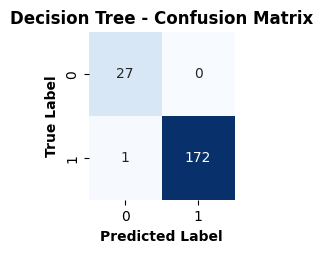

In [74]:
# 3. Confusion Matrix - Decision Tree
ax3 = plt.subplot(2, 3, 3)
cm_dt = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=ax3, cbar=False)
ax3.set_title('Decision Tree - Confusion Matrix', fontsize=12, fontweight='bold')
ax3.set_ylabel('True Label', fontweight='bold')
ax3.set_xlabel('Predicted Label', fontweight='bold')



Text(0.5, 23.52222222222222, 'Predicted Label')

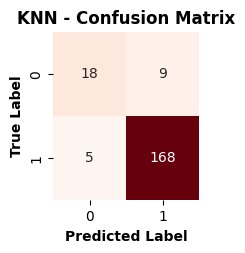

In [36]:
# 4. Confusion Matrix - KNN
ax4 = plt.subplot(2, 3, 4)
cm_knn = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds', ax=ax4, cbar=False)
ax4.set_title('KNN - Confusion Matrix', fontsize=12, fontweight='bold')
ax4.set_ylabel('True Label', fontweight='bold')
ax4.set_xlabel('Predicted Label', fontweight='bold')

Text(0.5, 23.52222222222222, 'Predicted Label')

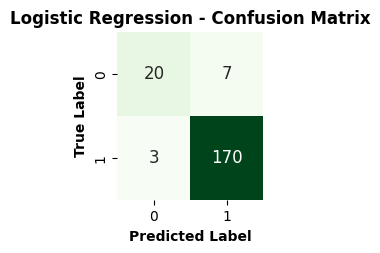

In [95]:
# 5. Confusion Matrix - Logistic Regression
ax5 = plt.subplot(2, 3, 5)
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=ax5, cbar=False, annot_kws={'fontsize': 12})
ax5.set_title('Logistic Regression - Confusion Matrix', fontsize=12, fontweight='bold')
ax5.set_ylabel('True Label', fontweight='bold')
ax5.set_xlabel('Predicted Label', fontweight='bold')
